## #1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

# Hypothesis
from scipy.stats import norm, ttest_ind, f_oneway

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

## #2. Importing Dataset

In [ ]:
# downloading dataset
!gdown --id 1Y67AYUcEQKRt6JheJOzwTkmF_Ts7zQpo

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Y67AYUcEQKRt6JheJOzwTkmF_Ts7zQpo
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 65.9MB/s]


In [ ]:
# reading dataset
df = pd.read_csv('walmart_data.csv')
df.tail(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


Attributes of Black Friday Transaction Records

1.   Primary Variables
    - User ID
    - Purchase Amount

2. Product Details
  - Product Category
  - Product ID

3. Customer Details
  - Gender
  - Marital
  - Age (bins)
  - Occupation (Masked)

4. City Details
  - City Category
  - Stay in City

# #3. Dataset Overview

In [ ]:
df.shape

(550068, 10)

* There are 550k transaction records

In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


* There are no NaNs

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


* There are 20 different occupations
* There is 40-60 split in Gender
* There are 20 different Products
* There are no Negative Purchases (Return Orders). All Purchases are assumed to be valid, there no possible outliers in purchases

# #4. Population Analysis

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
for col in df.columns:
  print(f'{col}: {df[col].value_counts()}', '\n')

User_ID: User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64 

Product_ID: Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64 

Gender: Gender
M    414259
F    135809
Name: count, dtype: int64 

Age: Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64 

Occupation: Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
print(f" Number of Men Customers - {df[df['Gender'] == 'M']['User_ID'].nunique()}")
print(f" Number of Women Customers - {df[df['Gender'] == 'F']['User_ID'].nunique()}")

 Number of Men Customers - 4225
 Number of Women Customers - 1666


In [ ]:
(1666 / (4225 + 1666)) * 100

28.28042777117637

In [ ]:
(4225 / (4225 + 1666)) *100

71.71957222882362

* **71.7**% Customers are Males
* **28.3%** Customers are Females

In [ ]:
print(f" Total Number of Customers are - {df['User_ID'].nunique()}")
# print(f" Number of Unmarried Customers - {df[df['Marital_Status'] == 0]['User_ID'].nunique()}")

print('\n', f"Number of Married Customers - {df[df['Marital_Status'] == 1]['User_ID'].nunique()}")
print(f" Number of Unmarried Customers - {df[df['Marital_Status'] == 0]['User_ID'].nunique()}")

print('\n', f"Percentage of Unmarried Customers = {((df[df['Marital_Status'] == 0]['User_ID'].nunique()) / (df[df['Marital_Status'] == 0]['User_ID'].nunique() + (df[df['Marital_Status'] == 1]['User_ID'].nunique()))) * 100 }")
print(f" Percentage of Married Customers = { ((df[df['Marital_Status'] == 1]['User_ID'].nunique()) / (df[df['Marital_Status'] == 0]['User_ID'].nunique() + (df[df['Marital_Status'] == 1]['User_ID'].nunique()))) * 100 }")


 Total Number of Customers are - 5891

 Number of Married Customers - 2474
 Number of Unmarried Customers - 3417

 Percentage of Unmarried Customers = 58.0037345102699
 Percentage of Married Customers = 41.99626548973009


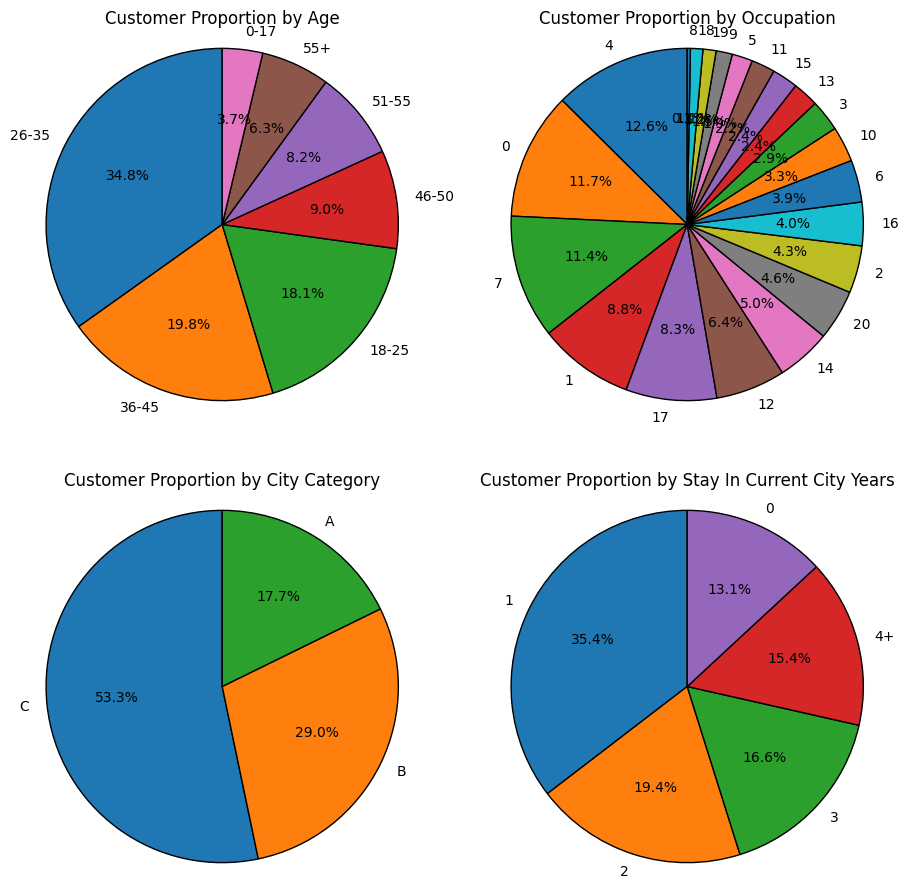

In [ ]:
def plot_group_pie_chart(df, column, user_col='User_ID', labels=None, bins=None):

    # Count the number of unique users in each category
    group_counts = df.groupby(column)[user_col].nunique()

    # Calculate the total number of unique users
    total_users = group_counts.sum()

    # Calculate percentages
    percentages = (group_counts / total_users) * 100

    # Sort the percentages in descending order (from high to low)
    percentages = percentages.sort_values(ascending=False)

    # Plot the pie chart
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})   # colors=plt.cm.Paired.colors,
    plt.title(f'Customer Proportion by {column.replace("_", " ")}')
    plt.axis('equal')     # Equal aspect ratio ensures that pie chart is circular.

# For Marital Status

plt.figure(figsize = (11, 11))

# Age Plot
plt.subplot(2, 2, 1)
plot_group_pie_chart(df, column='Age', labels=df['Age'].value_counts().index )

# Occupation Plot
plt.subplot(2, 2, 2)
plot_group_pie_chart(df, column='Occupation', labels=df['Occupation'].value_counts().index )

# City_Category Plot
plt.subplot(2, 2, 3)
plot_group_pie_chart(df, column='City_Category', labels=df['City_Category'].value_counts().index )

# City_Category Plot
plt.subplot(2, 2, 4)
plot_group_pie_chart(df, column='Stay_In_Current_City_Years', labels=df['City_Category'].value_counts().index )


plt.show()


* **70%** Customers are in Age Groups **18-25, 26-35 and 36-45** years. About **35%** customers are in Age Group **26-35**   
* More than **50%** Customers belong to Occupations **4, 0, 7, 1, 17** (Top 5 Occupations)
* City Category **B** has highest population density (**53.3%**) followed by **C and A**
* About **55%** Customers are staying for **1 to 2 years** in City. About **32%** Customers are staying for 3+ years in City.  

# #5. Purchase Analysis

## 5.1 Overall Total Purchases

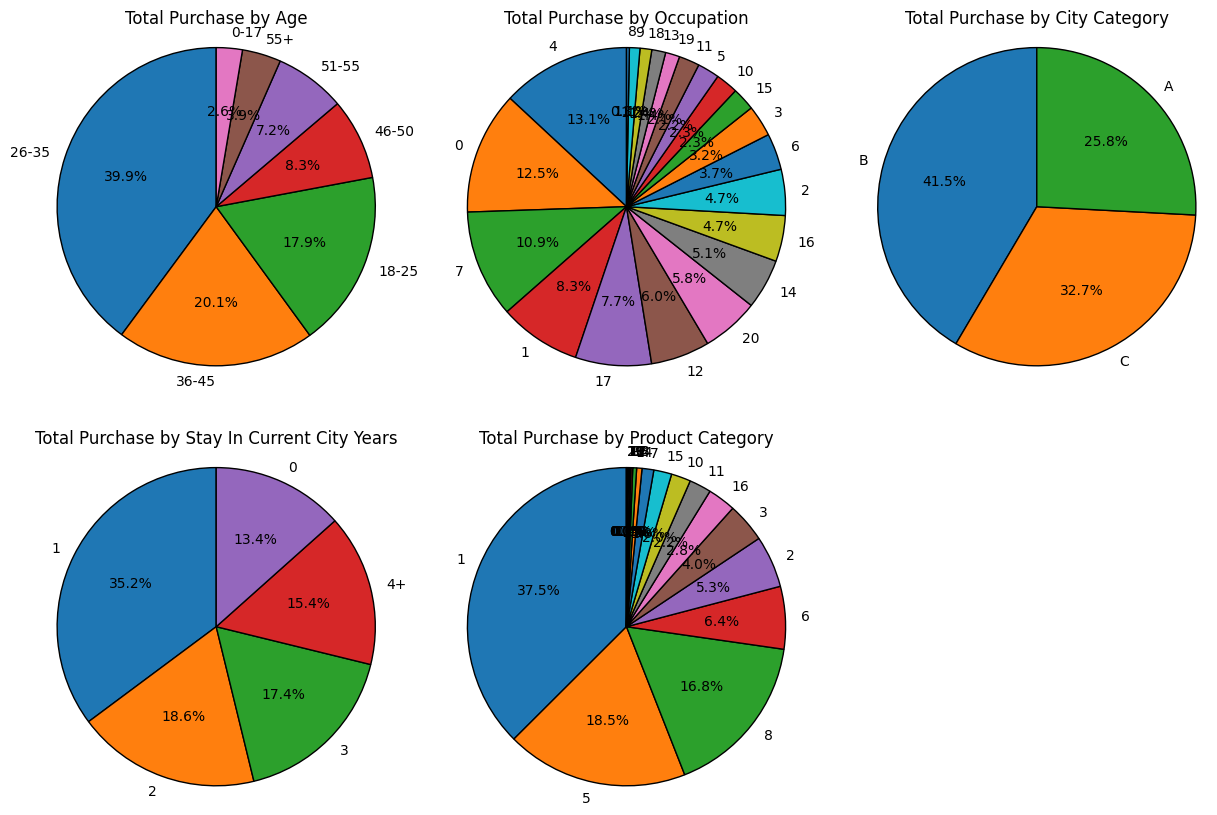

In [ ]:
def plot_group_pie_chart(df, column):

    # Count the number of unique users in each category
    group_sum = df.groupby(column)['Purchase'].sum()

    # Calculate the total number of unique users
    total_sum = group_sum.sum()

    # Calculate percentages
    percentages = (group_sum / total_sum) * 100

    # Sort the percentages in descending order (from high to low)
    percentages = percentages.sort_values(ascending=False)

    # Plot the pie chart
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})   # colors=plt.cm.Paired.colors,
    plt.title(f'Total Purchase by {column.replace("_", " ")}')
    plt.axis('equal')     # Equal aspect ratio ensures that pie chart is circular.


plt.figure(figsize = (15, 10))

# Age Plot
plt.subplot(2, 3, 1)
plot_group_pie_chart(df, column='Age' )

# Occupation Plot
plt.subplot(2, 3, 2)
plot_group_pie_chart(df, column='Occupation' )

# City_Category Plot
plt.subplot(2, 3, 3)
plot_group_pie_chart(df, column='City_Category' )

# City_Category Plot
plt.subplot(2, 3, 4)
plot_group_pie_chart(df, column='Stay_In_Current_City_Years' )

# Product Plot
plt.subplot(2, 3, 5)
plot_group_pie_chart(df, column='Product_Category' )

plt.show()


* **78%** of Total Purchase is from Age groups of **18-25, 26-35 and 36-45** years. About **40%** of Total Purchase is from Age Group **26-35** years.   
* More than **50%** of Total Sales are from Occupations **4, 0, 7, 1, 17** (Top 5 Occupations)
* City Category **B** has Total Purchases of **41.5%** followed by **C and A**
* About **53%** of Total Purchases are from Customers staying for **1 to 2 years** in City. About **32%** Total purchases are from Customers staying for 3+ years in City.  
* About **71%** of Total Purchases are from Product categories **1, 5, and 8**.

* **53.3%** Customers are in Type A Cities, but only contribute to **41%** Purchases. Total Purchases can improve if we focus targetting Type A Cities.
* Type A Cities have **17%** Customers but they contribute to **26%** Sales, Increasing Distribution (Outlets) in Type A will increase total purchases.  

In [ ]:
df[df['Product_Category'] == 1]['Purchase'].sum()
# / df['Purchase'].sum()

1910013754

## #5.2 Customer Purchases

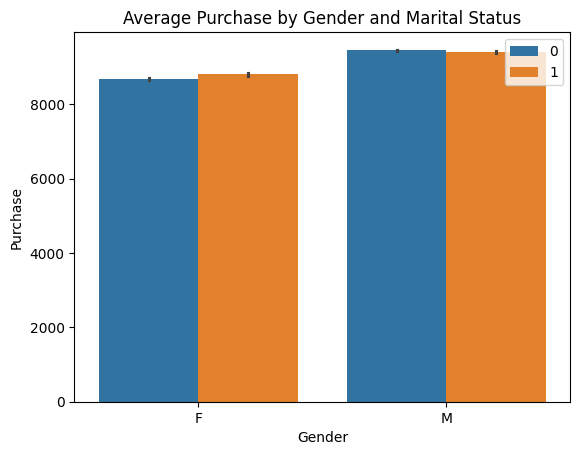

In [ ]:
sns.barplot(x = 'Gender', data=df, hue = 'Marital_Status', y='Purchase')

plt.title('Average Purchase by Gender and Marital Status')
plt.legend(loc='upper right')
plt.show()

* Average purchases from different Marital Status is almost same
* Average Purchases from different Male customers is slightly larger than purchases from Female Customers.

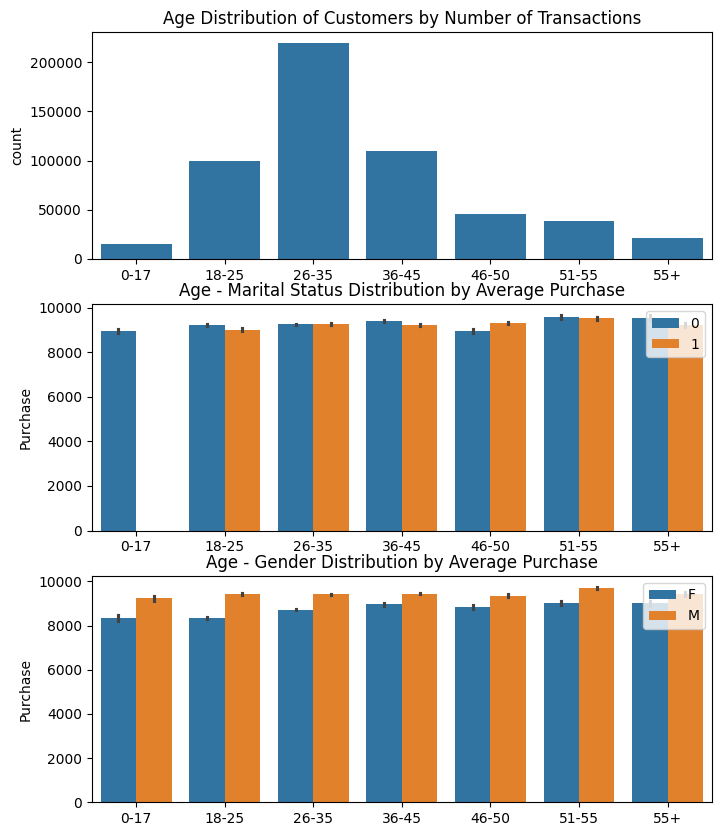

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 10))

plt.subplot(3, 1, 1)
sns.countplot(x='Age', data=df, order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Age Distribution of Customers by Number of Transactions')
plt.xlabel(None)


plt.subplot(3, 1, 2)
sns.barplot(x='Age', data=df, hue='Marital_Status', y='Purchase', order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Age - Marital Status Distribution by Average Purchase')
plt.legend(loc = 'upper right')
plt.xlabel(None)

plt.subplot(3, 1, 3)
sns.barplot(x='Age', data=df, hue='Gender', y='Purchase', order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Age - Gender Distribution by Average Purchase')
plt.legend(loc = 'upper right')
plt.xlabel(None)
plt.show()

* Total Transactions by Age distribution seems resembling to right skewed Gaussian Distribution
* Average Purchase Amount is same for all age groups, gender and Marital Status

In [ ]:
# sns.countplot(x='Occupation', data=df)
# plt.title('Occupation Distribution of Customers')
# plt.show()

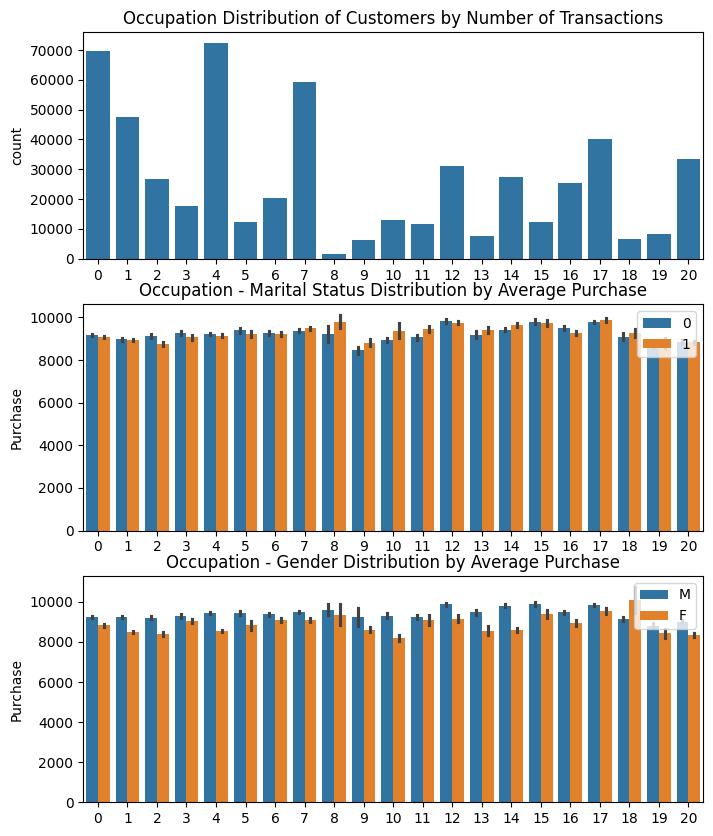

In [ ]:
fig = plt.figure(figsize=(8, 10))

plt.subplot(3, 1, 1)
sns.countplot(x='Occupation', data=df)
plt.title('Occupation Distribution of Customers by Number of Transactions')
plt.xlabel(None)

plt.subplot(3, 1, 2)
sns.barplot(x='Occupation', data=df, hue='Marital_Status', y='Purchase')
# sns.countplot(x='Occupation', data=df, hue='Marital_Status')
plt.title('Occupation - Marital Status Distribution by Average Purchase')
plt.legend(loc = 'upper right')
plt.xlabel(None)

plt.subplot(3, 1, 3)
sns.barplot(x='Occupation', data=df, hue='Gender', y='Purchase')
# sns.countplot(x='Occupation', data=df, hue='Gender')
plt.title('Occupation - Gender Distribution by Average Purchase')
plt.legend(loc = 'upper right')
plt.xlabel(None)
plt.show()

* Top 5 Occupation of Customers are 4, 0, 7, 17 and 20
* Average Purchase Amount is similar for gender and Marital Status categories, with respect to Occupations

## #5.3 Product Purchases

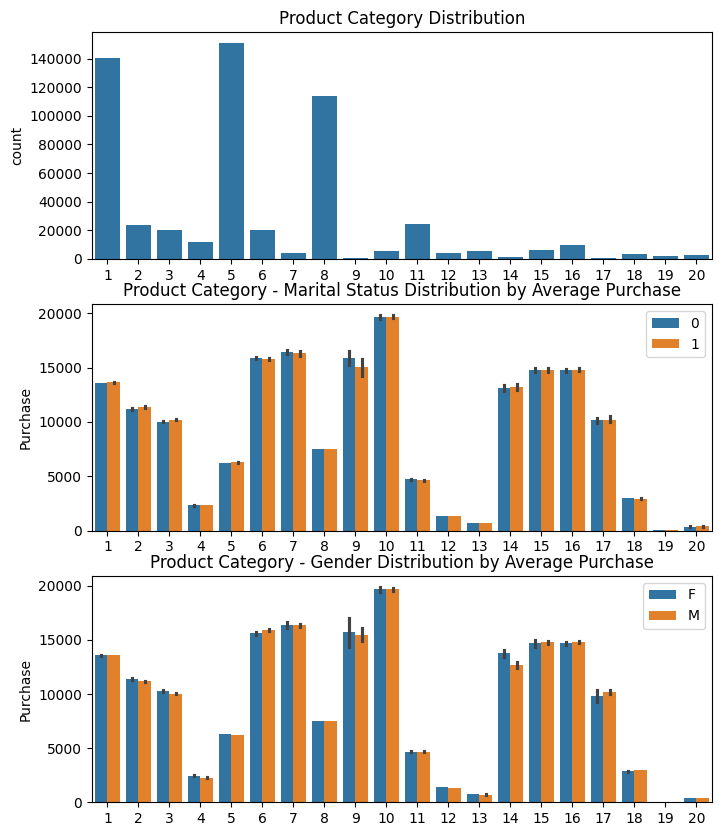

In [ ]:
fig = plt.figure(figsize=(8, 10))

plt.subplot(3, 1, 1)
sns.countplot(x='Product_Category', data=df)
plt.title('Product Category Distribution')
plt.xlabel(None)
# plt.show()

plt.subplot(3, 1, 2)
sns.barplot(x='Product_Category', data=df, hue='Marital_Status', y='Purchase')
# sns.countplot(x='Occupation', data=df, hue='Marital_Status')
plt.title('Product Category - Marital Status Distribution by Average Purchase')
plt.legend(loc = 'upper right')
plt.xlabel(None)

plt.subplot(3, 1, 3)
sns.barplot(x='Product_Category', data=df, hue='Gender', y='Purchase')
# sns.countplot(x='Occupation', data=df, hue='Gender')
plt.title('Product Category - Gender Distribution by Average Purchase')
plt.legend(loc = 'upper right')
plt.xlabel(None)
plt.show()

* Product Categories 1, 5, 8 are distinctly most frequently selling Categories
* Product Categories 10, 9, 7, 6 have highest Average Purchase
* Average Purchase Amount is almost same for gender and Marital Status

# #6. Hypothesis Testing

## #6.1 Women and Men Spending Analysis

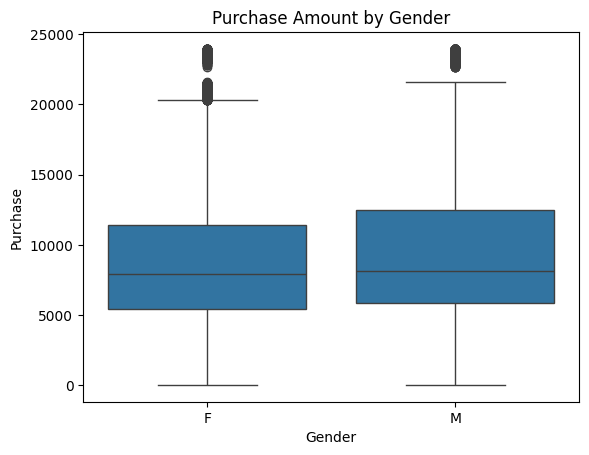

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Purchase Amount by Gender')
plt.show()

* Males have higher spread of spending than Females within Q1 and Q2
* Female Purchases have more outliers than Men

### #6.1.1 Hypothesis - Are women spending more money per transaction than men?

In [ ]:
mean_male = df[df['Gender'] == 'M']['Purchase'].mean()
mean_fem = df[df['Gender'] == 'F']['Purchase'].mean()

sd_male = df[df['Gender'] == 'M']['Purchase'].std()
sd_fem = df[df['Gender'] == 'F']['Purchase'].std()

n_male = df[df['Gender'] == 'M']['User_ID'].nunique()
n_fem = df[df['Gender'] == 'F']['User_ID'].nunique()

print(f'Mean Purchase Amount for Men: {mean_male}')
print(f'Mean Purchase Amount for Women: {mean_fem}', '\n')

print(f'Standard Deviation of Purchase Amount for Men: {sd_male}')
print(f'Standard Deviation of Purchase Amount for Women: {sd_fem}', '\n')

print(f'Number of Men Customers: {n_male}')
print(f'Number of Women Customers: {n_fem}')

Mean Purchase Amount for Men: 9437.526040472265
Mean Purchase Amount for Women: 8734.565765155476 

Standard Deviation of Purchase Amount for Men: 5092.186209777949
Standard Deviation of Purchase Amount for Women: 4767.233289291444 

Number of Men Customers: 4225
Number of Women Customers: 1666


* Since n > 30, distribution can be assumed to be Normal Distributed, Two sample Z-test can be applied here

In [ ]:
z = (mean_fem - mean_male) / ((sd_male**2 / n_male) + (sd_fem**2 / n_fem))**0.5
print(z)

alpha = 0.05      # 95% confidence

p_val = 1 - norm.cdf(z)
print(p_val)         # right sided test

if p_val < alpha:           # not p_val/2 - as right-sided test (more than men)
  print(f'As p-value {p_val} is less than {alpha}, reject null hypothesis. Per transaction, Women spend more than Men. ')
else:
  print(f'As p-value {p_val} is greater than {alpha}, fail to reject null hypothesis. Per transaction, Women Dont spend more than Men. ')

-4.9984068800183294
0.9999997109704482
As p-value 0.9999997109704482 is greater than 0.05, fail to reject null hypothesis. Per transaction, Women Dont spend more than Men. 


### #6.1.2 Are men spending more money per transaction than women?

In [ ]:
z = (mean_male - mean_fem) / ((sd_male**2 / n_male) + (sd_fem**2 / n_fem))**0.5       # reverse the order of num
print(z)

alpha = 0.05      # 95% confidence

p_val = 1 - norm.cdf(z)
print(p_val)         # right sided test

if p_val < alpha:           # not p_val/2 - as right-sided test (more than men)
  print(f'As p-value {p_val} is less than {alpha}, reject null hypothesis. Per transaction, Men spend more than Women. ')
else:
  print(f'As p-value {p_val} is greater than {alpha}, fail to reject null hypothesis. Per transaction, Men and Women spend same amount. ')

4.9984068800183294
2.8902955184761936e-07
As p-value 2.8902955184761936e-07 is less than 0.05, reject null hypothesis. Per transaction, Men spend more than Women. 


## #6.2 Are purchases similar across Cities?

In [ ]:
from scipy.stats import f_oneway

alpha = 0.05      # 95% confidence

a = df[(df['City_Category'] == 'A')]['Purchase']        # (df['Gender'] == 'M') &
b = df[(df['City_Category'] == 'B')]['Purchase']        # (df['Gender'] == 'M') &
c = df[(df['City_Category'] == 'C')]['Purchase']        # (df['Gender'] == 'M') &

stat, p_val = f_oneway(a, b, c)
print(p_val)

if p_val < alpha:           # not p_val/2 ----> Annova in scipy is inherently is two-sided test
  print(f'As p-value {p_val} is less than {alpha}, reject null hypothesis. Purchases are different in Cities A, B and C.')
else:
  print(f'As p-value {p_val} is greater than {alpha}, fail to reject null hypothesis. Purchases are similar in Cities A, B and C.')


0.0
As p-value 0.0 is less than 0.05, reject null hypothesis. Purchases are different in Cities A, B and C.


In [ ]:
mean_a = df[(df['City_Category'] == 'A') ]['Purchase'].mean()

mean_b = df[(df['City_Category'] == 'B') ]['Purchase'].mean()

mean_c = df[(df['City_Category'] == 'C') ]['Purchase'].mean()

print(mean_a, mean_b, mean_c)

8911.939216084484 9151.300562781986 9719.92099313568


* Average Purchase in City C is highest, followed by City B and City A resp.

In [ ]:
from scipy.stats import ttest_ind

# City A vs City B
stat, p_val = ttest_ind(a, b)
p_val = p_val / 2         # # one tailed test
print(p_val)

if p_val < alpha:
  print(f'As p-value {p_val} is less than {alpha}, reject null hypothesis. City B has more purchases than City A')
else:
  print(f'As p-value {p_val} is greater than {alpha}, fail to reject null hypothesis. City B and City A have similar purchases.')


# City B vs City C
stat, p_val = ttest_ind(b, c)
p_val = p_val / 2         # one tailed test
print(p_val)

if p_val < alpha:
  print(f'As p-value {p_val} is less than {alpha}, reject null hypothesis. City C has more purchases than City B')
else:
  print(f'As p-value {p_val} is greater than {alpha}, fail to reject null hypothesis. City B and City C have similar purchases.')



2.1385650137901946e-48
As p-value 2.1385650137901946e-48 is less than 0.05, reject null hypothesis. City B has more purchases than City A
2.4344481870003652e-272
As p-value 2.4344481870003652e-272 is less than 0.05, reject null hypothesis. City C has more purchases than City B


## 6.3 Confidence Intervals for Males and Females

In [ ]:
z1 = norm.ppf(0.025)
z2 = norm.ppf(0.975)
print(z1, z2)

dp1 = mean_male + z1 * (sd_male / n_male**0.5)
dp2 = mean_male + z2 * (sd_male / n_male**0.5)
print(f'Confidence Interval for Male Purchases is [{dp1}, {dp2}]')


dp1 = mean_fem + z1 * (sd_fem / n_fem**0.5)
dp2 = mean_fem + z2 * (sd_fem / n_fem**0.5)
print(f'Confidence Interval for Female Purchases is [{dp1}, {dp2}]')

-1.9599639845400545 1.959963984540054
Confidence Interval for Male Purchases is [9283.979862414782, 9591.072218529747]
Confidence Interval for Female Purchases is [8505.649317662042, 8963.482212648909]


* If men purchase outside range of [9422.01944736257, 9453.032633581959], it will be considered low/high purchase amount
* If women purchase outside range of [8709.21154714068, 8759.919983170272], it will be considered low/high purchase amount
* There is no overlap between Confidence Intervals of Male and Female purchases, Males tend to spend more than Women.

## #6.4 Distribution of Purchases by Female and Male Customers

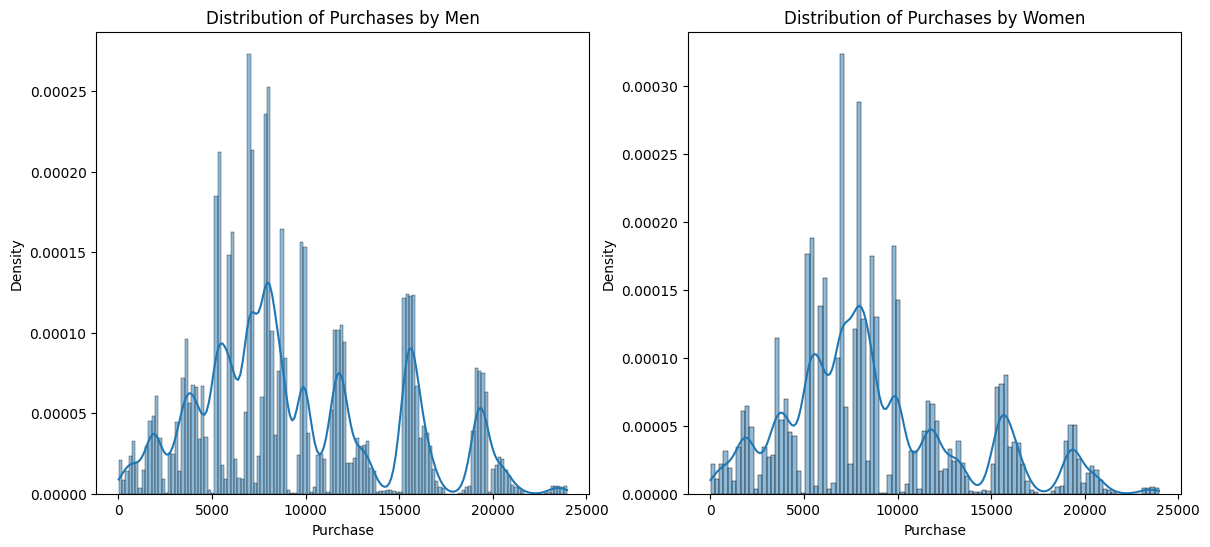

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df[df['Gender'] == 'M']['Purchase'], kde=True, stat='density')
plt.title('Distribution of Purchases by Men')

plt.subplot(1,2,2)
sns.histplot(df[df['Gender'] == 'F']['Purchase'], kde=True, stat='density')
plt.title('Distribution of Purchases by Women')
plt.show()

* Men and Women Puchases appear to be Right Skewed Normal Distributed, this will be further validated with QQ-Plot

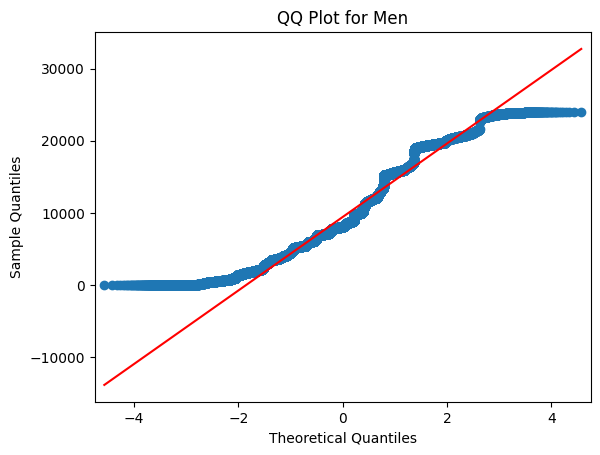

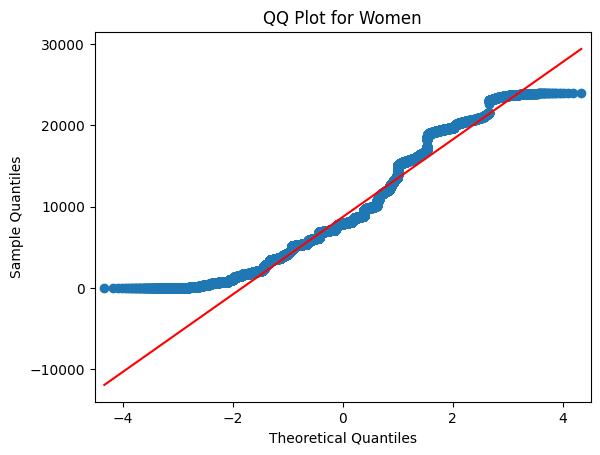

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df[df['Gender'] == 'M']['Purchase'], line='s')
plt.title('QQ Plot for Men')
plt.show()

# plt.subplot(1,2,2)
qqplot(df[df['Gender'] == 'F']['Purchase'], line='s')
plt.title('QQ Plot for Women')
plt.show()

* Men and Women Purchases are not perfectly Normal Distributed
* Men purchases resemble more to the Normal Distribution

## #6.5 Hypothesis Test - Are Customers with more number of Transactions Purchasing more?

In [ ]:
# since each row represents a transaction, assigning index as transaction ID

df['Transaction_ID'] = df.index
df['Transaction_ID'] = df['Transaction_ID'].astype('str')

df1 = df.groupby('User_ID').agg(
    Total_Transactions = ('Transaction_ID', 'count'),
    Total_Amount =('Purchase', 'sum')
).reset_index()

df1.head()

,User_ID,Total_Transactions,Total_Amount
0,1000001,35,334093
1,1000002,77,810472
2,1000003,29,341635
3,1000004,14,206468
4,1000005,106,821001


In [ ]:
# median transactions
threshold_trans = df1['Total_Transactions'].median()
# threshold_trans = np.percentile(df1['Total_Transactions'], 70)
print(threshold_trans)

df1['High_Transactions_Bool'] = df1['Total_Transactions'] > threshold_trans

df1.head()

54.0


,User_ID,Total_Transactions,Total_Amount,High_Transactions_Bool
0,1000001,35,334093,False
1,1000002,77,810472,True
2,1000003,29,341635,False
3,1000004,14,206468,False
4,1000005,106,821001,True


In [ ]:
print( f" Average Purchase from High Transaction Count Customers = { np.round(df1[df1['High_Transactions_Bool'] == True]['Total_Amount'].mean(), 0) } " )
print( f" Average Purchase from Low Transaction Count Customers = {np.round(df1[df1['High_Transactions_Bool'] == False]['Total_Amount'].mean(), 0)}" )
print(f" Average Purchase from High Transaction Count Customers is { np.round(((df1[df1['High_Transactions_Bool'] == True]['Total_Amount'].mean() - df1[df1['High_Transactions_Bool'] == False]['Total_Amount'].mean()) / df1[df1['High_Transactions_Bool'] == False]['Total_Amount'].mean()) * 100 , 1) }%  more than Low Transaction Count Customers")

df1['High_Transactions_Bool'].value_counts()

 Average Purchase from High Transaction Count Customers = 1466772.0 
 Average Purchase from Low Transaction Count Customers = 270369.0
 Average Purchase from High Transaction Count Customers is 442.5%  more than Low Transaction Count Customers


,count
High_Transactions_Bool,
False,2963
True,2928


In [ ]:
high_samp = df1[df1['High_Transactions_Bool'] == True]['Total_Amount']
low_samp = df1[df1['High_Transactions_Bool'] == False]['Total_Amount']

alpha = 0.01        # 99% confidence interval

stat, p_val = ttest_ind(high_samp, low_samp)
p_val = p_val / 2           # one-sided test

if p_val < alpha:
  print(f'As p-value {p_val} is less than {alpha}, reject null hypothesis. Customers with more number of Transactions tend to spend more.')
else:
  print(f'As p-value {p_val} is greater than {alpha}, fail to reject null hypothesis. Customers with more number of Transactions do not spend more.')


As p-value 0.0 is less than 0.01, reject null hypothesis. Customers with more number of Transactions tend to spend more.


In [ ]:
(high_samp.sum() / (high_samp.sum() + low_samp.sum() )) * 100

84.27917938590531

* There is a 50-50 split between low number of transaction Customers and High number of Transaction Customers.
* There is significant difference in avg total purchase from low number of transaction Customers and High number of Transaction Customers.
* **67.8%** Total purchases are from Customers with High number of Transactions.
* Average Purchase from High Transaction Count Customers is **442.5%**  more than Low Transaction Count Customers

## #6.6 Married vs Single Customer Purchases

## #6.6.1 Are Married Customers Purchasing more than Single Customers

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Transaction_ID
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,3
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,4


In [ ]:
mean_m = df[df['Marital_Status'] == 1]['Purchase'].mean()
mean_s = df[df['Marital_Status'] == 0]['Purchase'].mean()

num_m = df[df['Marital_Status'] == 1]['User_ID'].nunique()
num_s = df[df['Marital_Status'] == 0]['User_ID'].nunique()

sd_m = df[df['Marital_Status'] == 1]['Purchase'].std()
sd_s = df[df['Marital_Status'] == 0]['Purchase'].std()

alpha = 0.05    # 95% confidence

z =  (mean_m - mean_s) /  ( ( ((sd_m**2) / num_m) + ((sd_s**2) / num_s) )  )**0.5
print(z)

p_val = 1 - norm.cdf(z)
print(p_val)

if p_val < alpha:
  print(f'As p-value {p_val} is less than {alpha}, reject null hypothesis. Married Customers purchase more than Single Customers.')
else:
  print(f'As p-value {p_val} is greater than {alpha}, failed to reject null hypothesis. Married and Single Customers spend have similar purchases.')


-0.035706989890586294
0.5142420015094205
As p-value 0.5142420015094205 is greater than 0.05, failed to reject null hypothesis. Married and Single Customers spend have similar purchases.


## #6.6.2 Confidence Intervals for Married and Single Customers

In [ ]:
z1 = norm.ppf(0.025)
z2 = norm.ppf(0.975)

dp_m1 = mean_m + z1 * (sd_m / num_m**0.5)
dp_m2 = mean_m + z2 * (sd_m / num_m**0.5)
print(f'Confidence Interval for Married Customers is [ {dp_m1, dp_m2 } ]')

dp_s1 = mean_s + z1 * (sd_s / num_s**0.5)
dp_s2 = mean_s + z2 * (sd_s / num_s**0.5)
print(f'Confidence Interval for Single Customers is [ {dp_s1, dp_s2 } ]')


Confidence Interval for Married Customers is [ (9063.485138776095, 9458.864009388652) ]
Confidence Interval for Single Customers is [ (9097.343731605095, 9434.471506237918) ]


* Our Hypothesis is validated, we have almost completely overlapping Confidence Intervals for Married and Single Customers


## #6.6.3 Married vs Single Customers in City A, B and C

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Transaction_ID
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,3
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,4


In [ ]:

def z_test_city(df, col1, col11, col2, city):

  mean_m = df[ (df[col1] == 1) & (df[col11] == city) ][col2].mean()
  mean_s = df[(df[col1] == 0) & (df[col11] == city) ][col2].mean()

  num_m = df[(df[col1] == 1) & (df[col11] == city) ]['User_ID'].nunique()
  num_s = df[(df[col1] == 0) & (df[col11] == city) ]['User_ID'].nunique()

  sd_m = df[(df[col1] == 1) & (df[col11] == city) ][col2].std()
  sd_s = df[(df[col1] == 0) & (df[col11] == city) ][col2].std()



  alpha = 0.05    # 95% confidence

  z =  (mean_m - mean_s) /  ( ( ((sd_m**2) / num_m) + ((sd_s**2) / num_s) )  )**0.5
  print(z)

  p_val = 1 - norm.cdf(z)
  print(p_val)

  if p_val < alpha:
    print(f'As p-value {p_val} is less than {alpha}, reject null hypothesis. Married Customers purchase more than Single Customers in City {city}')
  else:
    print(f'As p-value {p_val} is greater than {alpha}, failed to reject null hypothesis. Married and Single Customers spend have similar purchases in City {city}')

z_test_city(df, 'Marital_Status', 'City_Category', 'Purchase', 'A')
z_test_city(df, 'Marital_Status', 'City_Category', 'Purchase', 'B')
z_test_city(df, 'Marital_Status', 'City_Category', 'Purchase', 'C')


-0.5370039137759581
0.7043675446940805
As p-value 0.7043675446940805 is greater than 0.05, failed to reject null hypothesis. Married and Single Customers spend have similar purchases in City A
0.04177675993900613
0.4833383308584557
As p-value 0.4833383308584557 is greater than 0.05, failed to reject null hypothesis. Married and Single Customers spend have similar purchases in City B
0.16277938083327584
0.43534607171579065
As p-value 0.43534607171579065 is greater than 0.05, failed to reject null hypothesis. Married and Single Customers spend have similar purchases in City C


* Married and Single Customers have same purchases in all Cities as well
* Since spending across Married and Single Customers are pretty similar, further analytics in Married vs Single Customers is not much insightful, unless more detailed analysis is explored (like Married Customers in City A of Age etc).

## #6.7 Purchases by Age Groups

In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [ ]:
def z_test_age(df, col1, val1, val2, col2):

  mean_m = df[ (df[col1] == val1)  ][col2].mean()
  mean_s = df[(df[col1] == val2)  ][col2].mean()
  print(mean_m, mean_s)

  num_m = df[(df[col1] == val1)  ]['User_ID'].nunique()
  num_s = df[(df[col1] == val2)  ]['User_ID'].nunique()
  print(num_m, num_s)

  sd_m = df[(df[col1] == val1)  ][col2].std()
  sd_s = df[(df[col1] == val2)  ][col2].std()
  print(sd_m, sd_s)


  alpha = 0.05    # 95% confidence

  z =  (mean_m - mean_s) /  ( ( ((sd_m**2) / num_m) + ((sd_s**2) / num_s) )  )**0.5
  print(z)

  p_val = 1 - norm.cdf(z)
  p_val = p_val / 2         # two-sided test, checking if different or not
  print(p_val)

  if p_val < alpha:
    print(f'As p-value {p_val} is less than {alpha}, reject null hypothesis. Customers purchase in group {val1} and {val2} is Different')
  else:
    print(f'As p-value {p_val} is greater than {alpha}, failed to reject null hypothesis. Customers purchase in group {val1} and {val2} is Same')


# Sort by index in ascending order
age_counts_sorted = df['Age'].value_counts().sort_index(ascending=True)

for i in range(0, len(age_counts_sorted), 2):
  if i + 1 < len(age_counts_sorted):
    z_test_age(df, 'Age', age_counts_sorted.index[i], age_counts_sorted.index[i+1], 'Purchase')
  else:
    z_test_age(df, 'Age', age_counts_sorted.index[i], age_counts_sorted.index[0], 'Purchase')


8933.464640444974 9169.663606261289
218 1069
5111.11404600277 5034.321997176577
-0.6234332762026843
0.3667500408792253
As p-value 0.3667500408792253 is greater than 0.05, failed to reject null hypothesis. Customers purchase in group 0-17 and 18-25 is Same
9252.690632869888 9331.350694917874
2053 1167
5010.527303002927 5022.923879204652
-0.42755105350826506
0.33275549800140897
As p-value 0.33275549800140897 is greater than 0.05, failed to reject null hypothesis. Customers purchase in group 26-35 and 36-45 is Same
9208.625697468327 9534.808030960236
531 481
4967.216367142921 5087.368079602116
-1.030074451883638
0.4242562357117303
As p-value 0.4242562357117303 is greater than 0.05, failed to reject null hypothesis. Customers purchase in group 46-50 and 51-55 is Same
9336.280459449405 8933.464640444974
372 218
5011.493995603418 5111.11404600277
0.9306451950566311
0.0880092819544841
As p-value 0.0880092819544841 is greater than 0.05, failed to reject null hypothesis. Customers purchase in g

## #6.7 Purchases by Stay in City

In [ ]:
# Sort by index in ascending order
stay_counts_sorted = df['Stay_In_Current_City_Years'].value_counts().sort_index(ascending=True)

for i in range(0, len(stay_counts_sorted), 2):
  print(i)
  if i + 1 < len(stay_counts_sorted):
    z_test_age(df, 'Stay_In_Current_City_Years', stay_counts_sorted.index[i], stay_counts_sorted.index[i+1], 'Purchase')
  else:
    z_test_age(df, 'Stay_In_Current_City_Years', stay_counts_sorted.index[i], stay_counts_sorted.index[0], 'Purchase')


0
9180.075122987177 9250.145923300364
772 2086
4990.479940183807 5027.47693286234
-0.33262760718097634
0.31514614964936616
As p-value 0.31514614964936616 is greater than 0.05, failed to reject null hypothesis. Customers purchase in group 0 and 1 is Same
2
9320.429810090536 9286.904119221284
1145 979
5044.5882241064755 5020.343540755071
0.15307146735382
0.21958547910795223
As p-value 0.21958547910795223 is greater than 0.05, failed to reject null hypothesis. Customers purchase in group 2 and 3 is Same
4
9275.59887165687 9180.075122987177
909 772
5017.627593967199 4990.479940183807
0.3901131213302013
0.1741132251496188
As p-value 0.1741132251496188 is greater than 0.05, failed to reject null hypothesis. Customers purchase in group 4+ and 0 is Same


## #6.8 Purchases by Occupation

In [ ]:
# Sort by index in ascending order
occ_sorted = df['Occupation'].value_counts().sort_index(ascending=True)

for i in range(0, len(occ_sorted), 2):
  print(i)
  if i + 1 < len(occ_sorted):
    z_test_age(df, 'Occupation', occ_sorted.index[i], occ_sorted.index[i+1], 'Purchase')
  else:
    z_test_age(df, 'Occupation', occ_sorted.index[i], occ_sorted.index[0], 'Purchase')


0
9124.428587839973 8953.193269514612
688 517
4971.757402451444 4838.482159449014
0.6008808331467813
0.13697984003009822
As p-value 0.13697984003009822 is greater than 0.05, failed to reject null hypothesis. Customers purchase in group 0 and 1 is Same
2
8952.481683466225 9178.593087818697
256 170
4939.418662612788 5000.942718536853
-0.45923995698790315
0.3384845350146499
As p-value 0.3384845350146499 is greater than 0.05, failed to reject null hypothesis. Customers purchase in group 2 and 3 is Same
4
9213.980251147868 9333.149297856615
740 111
5043.674855429912 5025.616602820924
-0.23285355026240293
0.2960312178699215
As p-value 0.2960312178699215 is greater than 0.05, failed to reject null hypothesis. Customers purchase in group 4 and 5 is Same
6
9256.535691476296 9425.728222819745
228 669
4989.2160047237185 5086.097089134543
-0.44002717329698066
0.33502064333964254
As p-value 0.33502064333964254 is greater than 0.05, failed to reject null hypothesis. Customers purchase in group 6 and

## #6.9 Hypothesis - Are Top 3 Products Purchases Different

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Transaction_ID
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,3
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,4


In [ ]:
def z_test_prod(df, val1):

  mean_p = df[df['Product_Category'] == val1]['Purchase'].mean()
  mean_oth = df[df['Product_Category'] != val1]['Purchase'].mean()

  sd_p = df[df['Product_Category'] == val1]['Purchase'].std()
  sd_oth = df[df['Product_Category'] == val1]['Purchase'].std()

  n_p = df[df['Product_Category'] != val1]['Product_ID'].nunique()
  n_oth = df[df['Product_Category'] != val1]['Product_ID'].nunique()

  alpha = 0.05    # 95% confidence

  z = (mean_p - mean_oth) / ((sd_p**2 / n_p) + (sd_oth**2 / n_oth))**0.5
  print(z)

  p_value = 1- norm.cdf(z)
  print(p_value)

  if p_value < alpha:
    print(f'As p-value {p_value} is less than {alpha}, reject null hypothesis. Product {val1} Purchases are Higher compared Other Products')
  else:
    print(f'As p-value {p_value} is greater than {alpha}, failed to reject null hypothesis. Product {val1} Purchases are Same as Other Products')

# Top 3 Products are 1, 5, 8 from above analysis done in beginning
z_test_prod(df, 1)
z_test_prod(df, 5)
z_test_prod(df, 8)

# can be extended to all Products

# z_test_prod(df, 4)
# z_test_prod(df, 5)
# z_test_prod(df, 6)
# z_test_prod(df, 6)
# z_test_prod(df, 7)
# z_test_prod(df, 8)
# z_test_prod(df, 9)
# z_test_prod(df, 10)
# z_test_prod(df, 11)
# z_test_prod(df, 12)
# z_test_prod(df, 13)
# z_test_prod(df, 14)
# z_test_prod(df, 15)
# z_test_prod(df, 16)
# z_test_prod(df, 17)
# z_test_prod(df, 18)
# z_test_prod(df, 19)
# z_test_prod(df, 20)




53.72006576555841
0.0
As p-value 0.0 is less than 0.05, reject null hypothesis. Product 1 Purchases are Higher compared Other Products
-79.66847856627938
1.0
As p-value 1.0 is greater than 0.05, failed to reject null hypothesis. Product 5 Purchases are Same as Other Products
-39.74834340701699
1.0
As p-value 1.0 is greater than 0.05, failed to reject null hypothesis. Product 8 Purchases are Same as Other Products


* Product Category 1 is has highest purchases
* Product Category 1 has been validated to have higher Purchases compared to all other Product Categories.

# Recommendations

Recommendations
Increase Female Purchases
1.	Density of Male customers is significantly higher. 71.7% Customers are Males, 28.3% Customers are Females. Males have higher spread of spending than Females within Q1 and Q3. Female Purchases have more outliers than Men.
2.	There is no overlap between Confidence Intervals of Male and Female purchases, Males tend to spend more than Women.
3.	Our Hypothesis also proved Men are spending significantly more than women.
4.	This suggests there are more products for men, and they are purchasing in wider range. More female products should be included to increase Purchases from women. Special offer for women can also be leveraged.

Improvement in City wise Purchases
1.	53.3% Customers are in Type C Cities, but only contribute to 32.7% Purchases. Total Purchases can improve if we focus targeting Type C Cities, they have large Customer base that is under-purchasing.
2.	Moreover, our Hypothesis testing proved that City C is out-performing in average Purchases, City A can leverage strategies employed in City A.
3.	Type A Cities have 17% Customers but they contribute to 26% Sales, Increasing Distribution (Outlets) in Type A will increase total purchases.

Promote more number of Transactions
1.	Average Purchase from High Transaction Count Customers = 1466772.0
2.	Average Purchase from Low Transaction Count Customers = 270369.0
3.	Average Purchase from High Transaction Count Customers is 442.5%  more than Low Transaction Customers
4.	Hypothesis Proved - Customers with more number of Transactions tend to spend more.
5.	Promoting more number of transactions, by offers that encourages re-buys or re-visits can contribute to surge in total purchases.
Promote Premium Categories Purchases
1.	None of Premium Categories are significantly contributing to total Purchases (not in Top5 Categories).  Including Premium sections in stores or focusing on this Category by other means can increase purchase volumes.

Reduce Dependency in Product Category 1
1.	Product Category 1 alone contributes to 37.5% of Purchases. All other categories contribute to less than 20% of total Purchases
2.	Hypothesis Proved – Product 1 Purchases are Higher compared Other Products.
2.	Other Product Categories should also contribute equally to total purchases, making Walmart a complete variety store, not depending on any particular Category.


In [ ]:
1+1

2